In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [25]:
reference = np.loadtxt('Day 1/Tube/He with calibration.txt', dtype=np.str, skiprows=14)
reference = np.char.replace(reference, ',', '.').astype(np.float64)

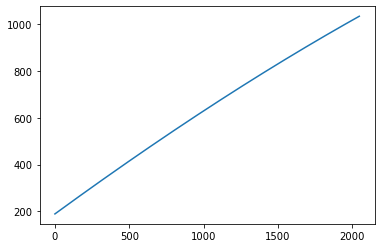

In [26]:
plt.plot(reference[:,0])

In [106]:
heights = {
    'H2' : 0.2,
    'Ar' : 0.7,
    'He' : 0.2,
    'Ne' : 0.6,
    'Hg' : 0.5
}
spectral_lines = {
    'H2' : [486, 656],
    'Ar' : [358, ],
    'He' : [388, 447, 501, 587, 667, 706],
    'Ne' : [640],
    'Hg' : [365, 435, 546]
}
relative_intensity = {
    'He' : np.array([500, 200, 100, 500, 100, 200])
}
for i in relative_intensity.keys():
    relative_intensity[i] = relative_intensity[i]/np.max(relative_intensity[i])

In [100]:
tube = 'Hg'
data = np.loadtxt('Day 1/Tube/'+tube+'.txt', dtype=np.str, skiprows=14)
data = np.char.replace(data, ',', '.').astype(np.float64)
data_bkg = np.loadtxt('Day 1/Tube/Background - '+tube+'.txt', dtype=np.str, skiprows=14)
data_bkg = np.char.replace(data_bkg, ',', '.').astype(np.float64)
data[:,1] = data[:,1]-data_bkg[:,1]
data[:,1] /= np.max(data[:,1])

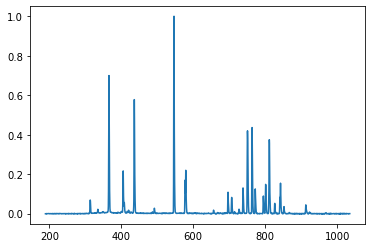

In [101]:
plt.plot(reference[:,0], data[:,1])

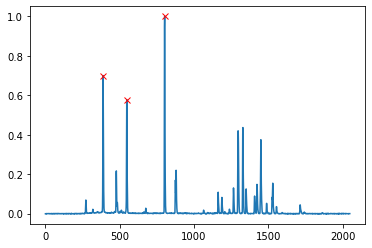

In [107]:
peaks = find_peaks(data[:,1], height=heights[tube])[0]
plt.plot(data[:,0], data[:,1])
plt.plot(data[peaks,0], data[peaks,1], 'rx')

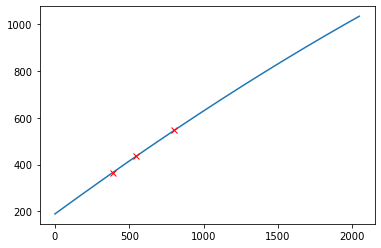

In [108]:
plt.plot(reference[:,0])
plt.plot(peaks, spectral_lines[tube], 'rx')

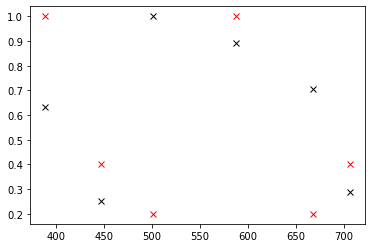

In [90]:
hs = data[peaks, 1]
plt.plot(reference[peaks,0], relative_intensity[tube], 'rx')
plt.plot(reference[peaks,0], hs, 'kx')